In [ ]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import nltk 
nltk.download('vader_lexicon')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
news_tables = {}
tickers = ['AMD', 'AMZN', 'FB', 'GOOG']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [ ]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

Is It Too Late to Buy Shopify Stock?
Jan-01-22 08:15AM  
3 Red-Hot Growth Stocks to Buy in 2022 and Beyond
08:00AM  
Will JD.com Be Worth More Than Tesla by 2032?
06:25AM  
Sea Limited Is Down 40% From Its High. Is It a Buy?
06:10AM  


In [ ]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AMD',
  'Jan-01-22',
  '09:09AM',
  'Dow Jones Futures: Xpeng, Nio EV Deliveries Strong With Tesla On Tap; Bring On The 2022 Market Rally'],
 ['AMD',
  'Dec-31-21',
  '04:02PM',
  'AMD Purchase Of Xilinx Delayed By Chinese Regulators'],
 ['AMD',
  'Dec-31-21',
  '12:45PM',
  'Looking for a Growth Stock? 3 Reasons Why Advanced Micro (AMD) is a Solid Choice'],
 ['AMD',
  'Dec-31-21',
  '11:06AM',
  'Xilinx Stock Slips as Takeover by AMD Pushed Back to First Quarter of 2022'],
 ['AMD',
  'Dec-31-21',
  '10:13AM',
  'Fortinet (FTNT) Up 142% YTD: Will the Rally Continue in 2022?'],
 ['AMD',
  'Dec-31-21',
  '10:07AM',
  "AMD's $35B acquisition delayed, SoFi pops on no news, Peloton's brutal year"],
 ['AMD',
  'Dec-31-21',
  '09:56AM',
  '3 Top Stocks to Play the Data Center Upgrade Cycle in 2022'],
 ['AMD',
  'Dec-31-21',
  '03:42AM',
  'Pre-Market Movers: AMD rises, Peloton and Tesla Dip, Exxon and Pfizer on Watch'],
 ['AMD',
  'Dec-31-21',
  '01:00AM',
  '16 Realistic Tech Predictions 

In [ ]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,AMD,2022-01-01,09:09AM,"Dow Jones Futures: Xpeng, Nio EV Deliveries St...",0.000,0.837,0.163,0.5106
1,AMD,2021-12-31,04:02PM,AMD Purchase Of Xilinx Delayed By Chinese Regu...,0.213,0.787,0.000,-0.2263
2,AMD,2021-12-31,12:45PM,Looking for a Growth Stock? 3 Reasons Why Adva...,0.000,0.592,0.408,0.6369
3,AMD,2021-12-31,11:06AM,Xilinx Stock Slips as Takeover by AMD Pushed B...,0.000,1.000,0.000,0.0000
4,AMD,2021-12-31,10:13AM,Fortinet (FTNT) Up 142% YTD: Will the Rally Co...,0.000,1.000,0.000,0.0000


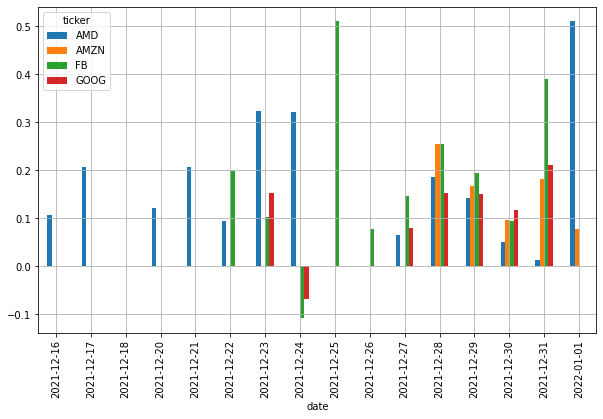

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()